## Model Development and Investigation Using Python

# 1. Data preperation
## 1.1. Load dataset

In [3]:
# Import the libraries needed
import numpy as np  # library to support large multi-dimensional arrays and matrices and functions     
import pandas as pd    # for data manipulation and analysis
import seaborn as sns    # plotting library
import matplotlib.pyplot as plt # plotting library
from sklearn.preprocessing import StandardScaler

# Load dataset 
eeg_data = pd.read_csv("Epileptic_featured _data.csv")

In [4]:
# Get the number of rows and columns
rows, cols = eeg_data.shape

print(f"Number of rows: {rows}")
print(f"Number of columns: {cols}")

Number of rows: 198
Number of columns: 42


In [5]:
# look at the first 10 rows
# NB: For the stat column, 1 indicates suject with Epilepsy while 2 indicates subject without Epilepsy
eeg_data.head(10)


,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,104,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,...,-0.12401,0.14298,-3.680500,0.262470,0.61617,0.58529,-0.53844,-0.071407,-0.097813,1
1,116,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,...,0.41673,0.58351,-3.111100,-0.080878,-1.10330,-1.83840,0.42514,0.496830,0.712690,1
2,117,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,...,0.85930,0.15079,-2.528500,-1.685500,-1.22000,0.63104,2.56250,-0.426800,-1.241900,1
3,124,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,...,-1.02680,11.21600,-1.556500,1.613700,4.83660,6.15950,-3.88050,-1.664800,-1.540100,1
4,134,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,...,-5.06020,7.04690,-1.567600,4.731700,-1.21520,-9.56020,-5.08090,3.472300,6.459600,1
5,144,0.123170,-3.5574,0.056111,0.342750,0.253910,-0.304410,0.103070,-0.079133,0.157630,...,-3.70290,41.61500,-0.593610,-8.665700,-10.58800,-6.53750,14.98200,1.171200,-1.966400,1
6,154,0.254410,-3.2297,0.044219,0.419610,0.338400,-0.399290,0.126320,-0.098886,0.216540,...,9.86520,162.38000,-0.407750,-5.985700,11.37200,30.33500,1.26370,-10.205000,-15.409000,1
7,164,0.435770,-2.9568,0.175720,0.533520,0.293150,-0.680460,0.180650,-0.023647,0.191680,...,24.46300,9.42610,0.016553,25.981000,11.98100,-14.73000,-36.07800,6.546600,18.943000,1
8,174,0.734640,-2.6768,0.184580,0.769230,0.403250,-0.889910,0.215390,-0.014049,0.122840,...,10.80100,852.17000,0.567930,-6.073900,-29.39400,-49.90300,23.57800,16.390000,17.720000,1
9,184,1.172900,-2.4294,0.218290,1.003200,0.645950,-0.956720,0.084467,-0.061459,0.024016,...,-39.65600,308.70000,0.533460,-49.663000,1.25330,73.89500,56.99400,-28.020000,-53.763000,1


In [6]:
# look at the last 10 rows
eeg_data.tail(10)

,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
188,914,1629.1,1.6521,170.410,172.60,-113.8800,-162.1600,-178.79,-93.199,23.892,...,-10.264,2390.900,1.7044,13.2140,118.0100,94.47300,117.6800,-54.636,-224.360,2
189,915,2015.5,1.6652,177.470,182.69,-106.1700,-143.8800,-193.32,-96.355,212.110,...,183.910,1060.000,1.9733,65.0590,-215.7000,-260.91000,-3.8041,321.820,-185.240,2
190,923,2377.7,1.6701,178.210,189.91,-96.4230,-121.7400,-202.57,-96.440,472.020,...,146.860,357.250,1.8271,-162.2900,1.5469,98.00100,-75.7650,-353.910,305.900,2
191,933,2690.3,1.6637,172.780,194.34,-84.9990,-96.2780,-206.45,-93.574,677.820,...,-24.883,3158.800,1.9551,30.1180,157.1900,104.10000,19.5760,-109.300,34.377,2
192,943,2931.1,1.6425,161.550,196.11,-72.2850,-68.2490,-204.99,-87.904,756.030,...,-137.930,169.890,1.8044,201.6700,-66.0260,-145.38000,-33.3090,588.510,-257.240,2
193,953,3081.8,1.6067,145.080,195.28,-58.6260,-38.4250,-198.38,-79.629,698.170,...,-84.218,4031.900,1.8174,-155.1300,-42.3170,115.49000,80.5150,-261.440,54.857,2
194,963,3133.2,1.5565,124.050,192.08,-44.5010,-7.5925,-187.01,-69.065,549.670,...,79.429,86.427,1.6971,-89.3720,17.5250,-24.92400,55.2890,-508.360,154.750,2
195,973,3079.7,1.5147,99.366,186.84,-30.2890,23.3850,-171.44,-56.570,373.610,...,176.220,3300.500,1.6213,149.5300,-2.0632,-160.97000,-195.0400,491.100,-51.282,2
196,983,2927.7,1.4758,71.948,179.82,-16.3960,53.6750,-152.27,-42.541,224.250,...,82.012,38.807,1.6906,-38.7990,61.9290,225.62000,46.6390,277.760,-91.639,2
197,993,2689.0,1.4469,42.874,171.37,-3.2302,82.4720,-130.25,-27.443,125.620,...,-113.910,3428.200,1.8279,-2.6393,-55.3430,-0.42343,166.7000,-476.780,18.309,2


In [7]:
# Count occurrences of each value in the 'stat' column
epilepsy_counts = eeg_data['stat'].value_counts()

# Display the results
print("Number of subjects by epilepsy status:")
print(epilepsy_counts)

# Extract specific counts
epilepsy = epilepsy_counts.get(1, 0)  # Number with epilepsy (stat = 1)
non_epilepsy = epilepsy_counts.get(2, 0)  # Number without epilepsy (stat = 2)

print(f"Subjects with epilepsy (stat = 1): {epilepsy}")
print(f"Subjects without epilepsy (stat = 2): {non_epilepsy}")

Number of subjects by epilepsy status:
stat
1    99
2    99
Name: count, dtype: int64
Subjects with epilepsy (stat = 1): 99
Subjects without epilepsy (stat = 2): 99


In [8]:
# Basic exploration
print(eeg_data.info())
# Statistical Summary, excluding ID and stat
print(eeg_data.drop(columns=['ID', 'stat']).describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      198 non-null    int64  
 1   pow_d   198 non-null    float64
 2   fr_d    198 non-null    float64
 3   cd1_d   198 non-null    float64
 4   cd2_d   198 non-null    float64
 5   cd3_d   198 non-null    float64
 6   cd4_d   198 non-null    float64
 7   cd5_d   198 non-null    float64
 8   cd6_d   198 non-null    float64
 9   pow_t   198 non-null    float64
 10  fr_t    198 non-null    float64
 11  cd1_t   198 non-null    float64
 12  cd2_t   198 non-null    float64
 13  cd3_t   198 non-null    float64
 14  cd4_t   198 non-null    float64
 15  cd5_t   198 non-null    float64
 16  cd6_t   198 non-null    float64
 17  pow_a   198 non-null    float64
 18  fr_a    198 non-null    float64
 19  cd1_a   198 non-null    float64
 20  cd2_a   198 non-null    float64
 21  cd3_a   198 non-null    float64
 22  cd

# 2. Feature analysis and dimensionality reduction
## 2.1. Identify and remove features that have missing values over a threshold :: 75%

<font size="4">Determine if there are any missing values in the dataset

In [11]:
# inspect missing values in the dataset
eeg_data.isnull()

,ID,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,...,cd6_b,pow_g,fr_g,cd1_g,cd2_g,cd3_g,cd4_g,cd5_g,cd6_g,stat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
194,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
196,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<font size="4">Sum up all missing values for each column / feature

In [13]:
# sum missing values
eeg_data.isnull().sum()

ID       0
pow_d    0
fr_d     0
cd1_d    0
cd2_d    0
cd3_d    0
cd4_d    0
cd5_d    0
cd6_d    0
pow_t    0
fr_t     0
cd1_t    0
cd2_t    0
cd3_t    0
cd4_t    0
cd5_t    0
cd6_t    0
pow_a    0
fr_a     0
cd1_a    0
cd2_a    0
cd3_a    0
cd4_a    0
cd5_a    0
cd6_a    0
pow_b    0
fr_b     0
cd1_b    0
cd2_b    0
cd3_b    0
cd4_b    0
cd5_b    0
cd6_b    0
pow_g    0
fr_g     0
cd1_g    0
cd2_g    0
cd3_g    0
cd4_g    0
cd5_g    0
cd6_g    0
stat     0
dtype: int64

<font size="4">Calculate percentage of missing values for each column.       
<font size="4">number of missing values / total number of samples per column

In [15]:
# Percentage of missing values
eeg_data.isnull().sum() / eeg_data.shape[0]

ID       0.0
pow_d    0.0
fr_d     0.0
cd1_d    0.0
cd2_d    0.0
cd3_d    0.0
cd4_d    0.0
cd5_d    0.0
cd6_d    0.0
pow_t    0.0
fr_t     0.0
cd1_t    0.0
cd2_t    0.0
cd3_t    0.0
cd4_t    0.0
cd5_t    0.0
cd6_t    0.0
pow_a    0.0
fr_a     0.0
cd1_a    0.0
cd2_a    0.0
cd3_a    0.0
cd4_a    0.0
cd5_a    0.0
cd6_a    0.0
pow_b    0.0
fr_b     0.0
cd1_b    0.0
cd2_b    0.0
cd3_b    0.0
cd4_b    0.0
cd5_b    0.0
cd6_b    0.0
pow_g    0.0
fr_g     0.0
cd1_g    0.0
cd2_g    0.0
cd3_g    0.0
cd4_g    0.0
cd5_g    0.0
cd6_g    0.0
stat     0.0
dtype: float64

In [16]:
# set threshold for missingness
missing_threshold=0.75

# for each column, divide number of missing values and divide by total number of samples
missingness = eeg_data.isnull().sum() / eeg_data.shape[0]

# get the missing stats dataframe
missing_stats = pd.DataFrame(missingness).rename(columns = { 0: 'missing_fraction'})
missing_stats

,missing_fraction
ID,0.0
pow_d,0.0
fr_d,0.0
cd1_d,0.0
cd2_d,0.0
cd3_d,0.0
cd4_d,0.0
cd5_d,0.0
cd6_d,0.0
pow_t,0.0


<font size="4">Drop features that have over 0.75 missingness (75%) missing values

In [18]:
missing_stats_filtered = missing_stats[missing_stats['missing_fraction'] > missing_threshold]
to_drop_missingness = missing_stats_filtered.index.tolist()

print("Columns to drop (missing fraction > 75%):", to_drop_missingness)
print(missing_stats_filtered)

Columns to drop (missing fraction > 75%): []
Empty DataFrame
Columns: [missing_fraction]
Index: []


## 2.2. identify and remove low variance features or no variance

- <font size="4">No-variance features are features where all values are identical across the subjects. Features with no variance cannot distinguish between epilepsy and non-epilepsy because they're constant across all subjects.
- <font size="4">Low-variance features are features with very little variation. Low variance features contribute minimally to classification, as their small changes are often noise rather than signal. 


In [21]:
# Extract features by dropping 'ID' and 'stat'
features = eeg_data.drop(columns=['ID', 'stat'])

# Count unique values in each feature
unique_counts = features.nunique()

# Print unique stats
print("Number of unique values per feature:")
print(unique_counts)

Number of unique values per feature:
pow_d    198
fr_d     196
cd1_d    198
cd2_d    198
cd3_d    198
cd4_d    198
cd5_d    198
cd6_d    198
pow_t    198
fr_t     196
cd1_t    198
cd2_t    197
cd3_t    198
cd4_t    198
cd5_t    198
cd6_t    198
pow_a    198
fr_a     198
cd1_a    198
cd2_a    198
cd3_a    198
cd4_a    198
cd5_a    198
cd6_a    198
pow_b    198
fr_b     196
cd1_b    198
cd2_b    198
cd3_b    198
cd4_b    198
cd5_b    198
cd6_b    198
pow_g    198
fr_g     197
cd1_g    198
cd2_g    198
cd3_g    198
cd4_g    198
cd5_g    198
cd6_g    198
dtype: int64


In [22]:
# create a dataFrame of the unique stats
unique_stats=pd.DataFrame(unique_counts).reset_index().rename(columns = {'index': 'feature', 0: 'unique_counts'})
unique_stats = unique_stats.sort_values('unique_counts', ascending = False)
unique_stats

,feature,unique_counts
0,pow_d,198
19,cd2_a,198
22,cd5_a,198
23,cd6_a,198
24,pow_b,198
26,cd1_b,198
27,cd2_b,198
28,cd3_b,198
29,cd4_b,198
30,cd5_b,198


## 2.3. Identify redundant features

In [24]:
# Set collinearity threshold
correlation_threshold = 0.80

# Calculate correlation matrix
corr_matrix = features.corr()

# Extract upper triangle
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identify features with correlation > threshold
to_drop_colinear = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

# Print results
print(f"Features with correlation > {correlation_threshold}: {to_drop_colinear}")
print(f"Original feature count: {features.shape[1]}")
print(f"Features after removing collinear ones: {features.shape[1] - len(to_drop_colinear)}")

Features with correlation > 0.8: ['fr_t', 'cd5_t', 'fr_a', 'fr_g']
Original feature count: 40
Features after removing collinear ones: 36



📦 Correlation matrix saved as 'correlation_matrix.png'


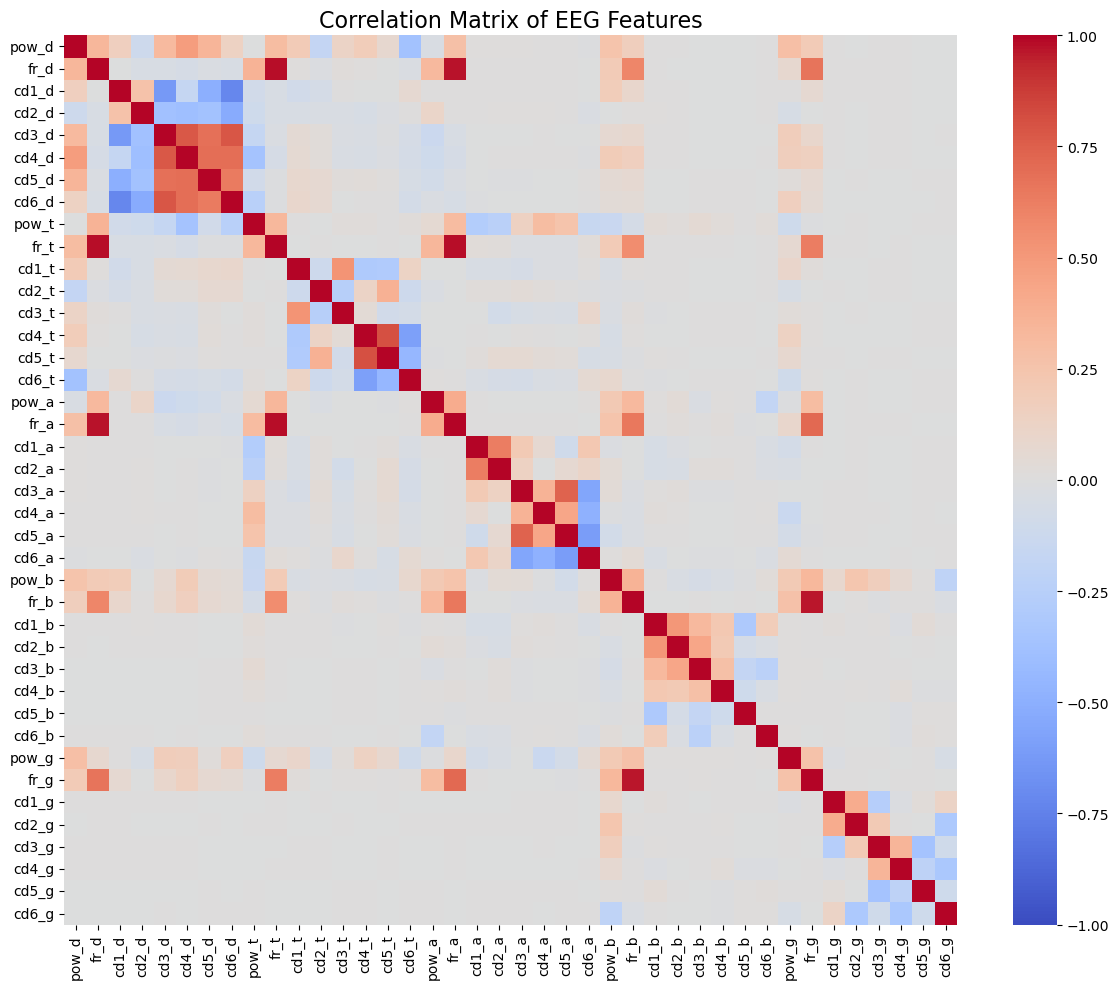

In [25]:
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix of EEG Features", fontsize=16)
plt.tight_layout()  # Ensures the title and labels fit well
plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')  # Save as PNG
print("\n📦 Correlation matrix saved as 'correlation_matrix.png'")
plt.show()

### inspect some of the colinearity

In [27]:
# Create a dataframe of correlated pairs
record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

In [28]:
# Iterate through the columns to record pairs of correlated features
for column in to_drop_colinear:

    # Find the correlated features
    corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

    # Find the correlated values
    corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
    drop_features = [column for _ in range(len(corr_features))]    

    # Record the information (need a temp df for now)
    temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                     'corr_feature': corr_features,
                                     'corr_value': corr_values})

    # Add to dataframe
    #record_collinear = record_collinear.append(temp_df, ignore_index = True)
    record_collinear = pd.concat([record_collinear, temp_df], ignore_index=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_11616\3992286775.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  record_collinear = pd.concat([record_collinear, temp_df], ignore_index=True)


In [29]:
collinear = record_collinear.sort_values(by='corr_value')
collinear

,drop_feature,corr_feature,corr_value
1,cd5_t,cd4_t,0.805549
4,fr_g,fr_b,0.966943
2,fr_a,fr_d,0.976291
3,fr_a,fr_t,0.980431
0,fr_t,fr_d,0.983228


## 2.4. identify all features to be dropped -- to reduce dimensionality due to
<font size="4">- missingness above threshold        
<font size="4">- no variance (features constant across the subject)       
<font size="4">- colinearity above threshold   

- <font size="4"> There are no missing values in the data and no feature has constant across the subject as the least unique value across the features is 196 out of 198 subjects.

In [31]:
# Since no missingness or low variance, features_to_drop is just collinear ones
to_drop_colinear=list(np.unique(collinear.drop_feature))
features_to_drop = np.unique(to_drop_colinear)  

# Print features to drop
print("Features to drop:", features_to_drop)

Features to drop: ['cd5_t' 'fr_a' 'fr_g' 'fr_t']


In [32]:
# create a processed dataset after removing features
processed_eeg_data = eeg_data.drop(columns=list(features_to_drop) + ['ID', 'stat'])  # Also drop ID and stat for features-only
processed_eeg_data.shape

(198, 36)

# 3. Model selection

### 3.1. Generate a 'processed_eeg_data' that only include the features that have not been removed
<font size="4">- generate a 'processed_eeg_data' that only include the features that have not been removed        
<font size="4">- select several and most commonly used classical machine learning models        
<font size="4">- train models using the 'processed_eeg_data'        
<font size="4">- select models that performed reasonably well      

Calculating accuracies...

Calculating accuracies
LR: 0.9900 ± 0.0200
LDA: 0.9750 ± 0.0335
KNN: 0.9497 ± 0.0500
DT: 0.9897 ± 0.0205
GNB: 0.9795 ± 0.0252
SVM: 1.0000 ± 0.0000
RF: 0.9950 ± 0.0150
BG: 0.9947 ± 0.0158
ET: 0.9950 ± 0.0150
SGDC: 0.9595 ± 0.0437
PER: 0.9642 ± 0.0521

📊 Ranked Models by Mean Accuracy:
1. SVM: 1.0000 ± 0.0000
2. RF: 0.9950 ± 0.0150
3. ET: 0.9950 ± 0.0150
4. BG: 0.9947 ± 0.0158
5. LR: 0.9900 ± 0.0200
6. DT: 0.9897 ± 0.0205
7. GNB: 0.9795 ± 0.0252
8. LDA: 0.9750 ± 0.0335
9. PER: 0.9642 ± 0.0521
10. SGDC: 0.9595 ± 0.0437
11. KNN: 0.9497 ± 0.0500

📦 Ranked models table saved as 'ranked_models.png'

📦 Boxplot saved as 'boxplot_comparison_accuracy.png'


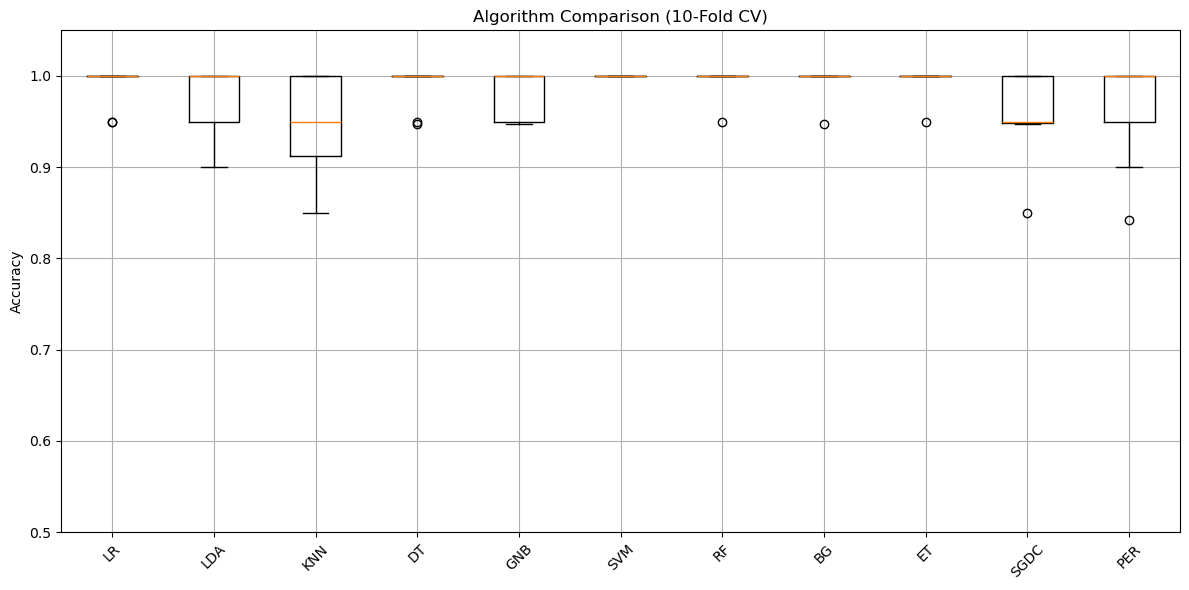

In [35]:
# Compare Algorithms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# sort the data and labels
# Convert 'stat' to binary: 1 (epilepsy) -> 1, 2 (non-epilepsy) -> 0
eeg_data['stat'] = eeg_data['stat'].replace({1: 1, 2: 0})
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(processed_eeg_data)
# Convert back to DataFrame to retain column names
X = pd.DataFrame(X_scaled, columns=processed_eeg_data.columns)
y=eeg_data['stat']
Y=y


# prepare configuration for cross validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=5000, solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier(random_state=seed)))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC(kernel='linear', probability=True, random_state=seed)))
models.append(('RF', RandomForestClassifier(random_state=seed)))
models.append(('BG', BaggingClassifier(random_state=seed)))
models.append(('ET', ExtraTreesClassifier(random_state=seed)))
models.append(('SGDC', SGDClassifier(random_state=seed)))
models.append(('PER', Perceptron(random_state=seed)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
print("Calculating accuracies...\n")

model_accuracies = []


# Accuracy
print('Calculating accuracies')
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    mean_acc = cv_results.mean()
    std_acc = cv_results.std()
    model_accuracies.append((name, mean_acc, std_acc))
    print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")

# Sort and display ranked list
print("\n📊 Ranked Models by Mean Accuracy:")
ranked_models = sorted(model_accuracies, key=lambda x: x[1], reverse=True)
for rank, (name, mean_acc, std_acc) in enumerate(ranked_models, 1):
    print(f"{rank}. {name}: {mean_acc:.4f} ± {std_acc:.4f}")

# Create a DataFrame for ranked models
ranked_df = pd.DataFrame(
    [[rank, name, f"{mean_acc:.4f}", f"{std_acc:.4f}"] for rank, (name, mean_acc, std_acc) in enumerate(ranked_models, 1)],
    columns=["Rank", "Model", "Mean Accuracy", "Std Dev"]
)

# Save ranked models as PNG
fig, ax = plt.subplots(figsize=(8, len(ranked_models) * 0.5 + 1))  # Dynamic height based on number of models
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=ranked_df.values,
                 colLabels=ranked_df.columns,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # Adjust scaling for readability
plt.title("Ranked Models by Mean Accuracy (10-Fold CV)", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig('ranked_models.png', dpi=300, bbox_inches='tight')
print("\n📦 Ranked models table saved as 'ranked_models.png'")
plt.close()

# Boxplot comparison
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=45)
plt.ylabel('Accuracy')
plt.title('Algorithm Comparison (10-Fold CV)')
plt.ylim(0.5, 1.05)
plt.grid()
plt.tight_layout()

# Save boxplot
plt.savefig('boxplot_comparison_accuracy.png', dpi=300, bbox_inches='tight')
print("\n📦 Boxplot saved as 'boxplot_comparison_accuracy.png'")
plt.show()

# 4. Feature selection          
- <font size="4">use any feature selection to identify the best set if features -- RFE CV (cv=5)          
- <font size="4">identify selected features          
- <font size="4">create 'best_features_df'   

In [37]:
# selected features are ranked 1
from sklearn.feature_selection import RFECV

# importance estimator
estimator=RandomForestClassifier(random_state=42)

# feature selector
selector = RFECV(estimator, step=1, cv=5)

# fit
selector = selector.fit(X, y)

# print feature ranking
selector.ranking_


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  3,  7,  5, 12,  1,  2,  1,
       11, 14, 16,  9,  6,  1, 17, 10,  8, 20, 23, 15, 13,  4, 18, 19, 21,
       24, 22])

In [38]:
# create a feature ranking dataframe
features = X.columns
feature_ranking = pd.DataFrame({'feature':features,'rank':selector.ranking_}).sort_values(by='rank',ascending=True)
print(feature_ranking.head(65))

   feature  rank
0    pow_d     1
1     fr_d     1
2    cd1_d     1
3    cd2_d     1
4    cd3_d     1
5    cd4_d     1
6    cd5_d     1
7    cd6_d     1
8    pow_t     1
9    cd1_t     1
22    fr_b     1
16   cd2_a     1
14   pow_a     1
15   cd1_a     2
10   cd2_t     3
30   cd1_g     4
12   cd4_t     5
21   pow_b     6
11   cd3_t     7
25   cd3_b     8
20   cd6_a     9
24   cd2_b    10
17   cd3_a    11
13   cd6_t    12
29   pow_g    13
18   cd4_a    14
28   cd6_b    15
19   cd5_a    16
23   cd1_b    17
31   cd2_g    18
32   cd3_g    19
26   cd4_b    20
33   cd4_g    21
35   cd6_g    22
27   cd5_b    23
34   cd5_g    24


In [39]:
import pandas as pd
import matplotlib.pyplot as plt


features = X.columns
feature_ranking = pd.DataFrame({'feature': features, 'rank': selector.ranking_}).sort_values(by='rank', ascending=True)

# Display the full ranking 
print(feature_ranking.head(65))

# Extract top features (rank = 1)
top_features = feature_ranking[feature_ranking['rank'] == 1].reset_index(drop=True)

# Extract bottom features (highest rank values, e.g., bottom 10)
bottom_features = feature_ranking.tail(5).reset_index(drop=True)

# Visualize Top Features as Bar Plot
plt.figure(figsize=(10, len(top_features) * 0.4))  # Dynamic height based on number of features
plt.barh(top_features['feature'], [1] * len(top_features), color='skyblue')  # All have rank 1
plt.xlabel('Rank (All = 1)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Top Features (Rank = 1)', fontsize=16)
plt.tight_layout()
plt.savefig('top_features_barplot.png', dpi=300, bbox_inches='tight')
print("\n📦 Top features bar plot saved as 'top_features_barplot.png'")
plt.close()

# Visualize Bottom Features as Bar Plot
plt.figure(figsize=(10, len(bottom_features) * 0.4))  # Dynamic height based on number of features
plt.barh(bottom_features['feature'], bottom_features['rank'], color='salmon')
plt.xlabel('Rank', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Bottom Features (Lowest Ranked)', fontsize=16)
plt.tight_layout()
plt.savefig('bottom_features_barplot.png', dpi=300, bbox_inches='tight')
print("\n📦 Bottom features bar plot saved as 'bottom_features_barplot.png'")
plt.close()

   feature  rank
0    pow_d     1
1     fr_d     1
2    cd1_d     1
3    cd2_d     1
4    cd3_d     1
5    cd4_d     1
6    cd5_d     1
7    cd6_d     1
8    pow_t     1
9    cd1_t     1
22    fr_b     1
16   cd2_a     1
14   pow_a     1
15   cd1_a     2
10   cd2_t     3
30   cd1_g     4
12   cd4_t     5
21   pow_b     6
11   cd3_t     7
25   cd3_b     8
20   cd6_a     9
24   cd2_b    10
17   cd3_a    11
13   cd6_t    12
29   pow_g    13
18   cd4_a    14
28   cd6_b    15
19   cd5_a    16
23   cd1_b    17
31   cd2_g    18
32   cd3_g    19
26   cd4_b    20
33   cd4_g    21
35   cd6_g    22
27   cd5_b    23
34   cd5_g    24

📦 Top features bar plot saved as 'top_features_barplot.png'

📦 Bottom features bar plot saved as 'bottom_features_barplot.png'


In [40]:
# extract selected features -- these are features with a ranking of 1
selected_features=feature_ranking[feature_ranking['rank']==1].feature
selected_features

0     pow_d
1      fr_d
2     cd1_d
3     cd2_d
4     cd3_d
5     cd4_d
6     cd5_d
7     cd6_d
8     pow_t
9     cd1_t
22     fr_b
16    cd2_a
14    pow_a
Name: feature, dtype: object

### We can finally create a new dataset, that         
- <font size="4">has been dimensionality reduced          
- <font size="4">has only best features selected     

In [42]:
# Create a new DataFrame with selected features, ensuring it's a copy
selected_features_dataframe = processed_eeg_data[selected_features].copy()
selected_features_dataframe['stat']=eeg_data['stat'].values

# display the dataset
selected_features_dataframe.head(10)

,pow_d,fr_d,cd1_d,cd2_d,cd3_d,cd4_d,cd5_d,cd6_d,pow_t,cd1_t,fr_b,cd2_a,pow_a,stat
0,0.002738,-5.6583,0.036320,0.085263,0.080991,-0.074508,-0.009881,-0.013535,0.005737,0.052573,-3.44320,0.098309,0.003640,1
1,0.001038,-5.1795,0.084537,0.072065,-0.040925,-0.137560,0.042706,0.062946,0.002779,0.126590,-2.42000,0.105530,0.002592,1
2,0.008285,-4.7623,0.031132,0.118660,0.072105,-0.093199,0.042200,-0.021422,0.018769,0.055939,-2.46000,0.158550,0.013253,1
3,0.043148,-4.2379,0.032466,0.196810,0.171380,-0.181750,0.030270,-0.059835,0.082812,0.036083,-1.33470,0.121230,0.032055,1
4,0.057360,-3.8907,0.112120,0.214150,0.065827,-0.291960,0.120500,-0.002113,0.093434,0.090912,-0.56186,-0.052665,0.018328,1
5,0.123170,-3.5574,0.056111,0.342750,0.253910,-0.304410,0.103070,-0.079133,0.157630,-0.053033,-0.62809,-0.184800,0.007011,1
6,0.254410,-3.2297,0.044219,0.419610,0.338400,-0.399290,0.126320,-0.098886,0.216540,-0.141700,0.14104,-0.455880,0.012616,1
7,0.435770,-2.9568,0.175720,0.533520,0.293150,-0.680460,0.180650,-0.023647,0.191680,-0.061306,0.71260,-0.647840,0.153230,1
8,0.734640,-2.6768,0.184580,0.769230,0.403250,-0.889910,0.215390,-0.014049,0.122840,-0.163480,0.58644,-0.601250,0.424580,1
9,1.172900,-2.4294,0.218290,1.003200,0.645950,-0.956720,0.084467,-0.061459,0.024016,-0.205780,1.21090,-0.284540,0.732680,1


In [43]:
selected_features_dataframe.shape

(198, 14)

In [44]:
# Statistical Summary, excluding stat
print(selected_features_dataframe.drop(columns=['stat']).describe())

              pow_d        fr_d       cd1_d       cd2_d       cd3_d  \
count    198.000000  198.000000  198.000000  198.000000  198.000000   
mean    1429.800282    1.210301   -5.332766   -4.465104   -7.221897   
std     2506.006160    1.566025  149.825244   89.810723  100.158688   
min        0.001038   -5.658300 -335.630000 -214.140000 -216.040000   
25%       57.806500    0.902580  -89.930000  -46.872500  -74.360250   
50%      343.400000    1.809550    1.405350    0.381180    0.187155   
75%     1372.050000    2.186425   92.093000   51.542500   23.476500   
max    11428.000000    2.385200  260.500000  196.110000  257.360000   

            cd4_d       cd5_d       cd6_d         pow_t       cd1_t  \
count  198.000000  198.000000  198.000000    198.000000  198.000000   
mean   -17.373891   -6.427881   -1.833646   2138.135907   -0.201203   
std    191.096327  141.313253   67.696588   3285.011643  114.940194   
min   -435.300000 -323.610000 -180.490000      0.002779 -300.810000   
25%  

# 5. Using all the 36 features dataset to          
- <font size="4">Train the selected models, to compare perform          
-  <font size="4">Report performance -- accuracy, f1_score, auc_score, precision and recall          

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = processed_eeg_data
y = eeg_data['stat']

# 2. Train-test split FIRST (before scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

# 3. Scale ONLY the training data, then apply same scaler to test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Convert back to DataFrame for readability
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# 
print("Data split and scaled correctly.")
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Data split and scaled correctly.
Training size: (138, 36)
Test size: (60, 36)


In [47]:
# Define top 5 models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC

models = {
    "SVM": SVC(probability=True, random_state=7),
    "Random Forest": RandomForestClassifier(random_state=7),
    "Extra Trees": ExtraTreesClassifier(random_state=7),
    "Bagging": BaggingClassifier(random_state=7),
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='liblinear')
}

In [48]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create folder for plots and outputs
output_dir = "All_features_model_plots"
os.makedirs(output_dir, exist_ok=True)

metrics_summary = []
conf_matrix_summary = {}


# Evaluation loop
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class (epilepsy)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = precision_score(y_test, y_pred)
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Save metrics
    metrics_summary.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Sensitivity": round(sensitivity, 4),
        "Specificity": round(specificity, 4),
        "Precision": round(precision, 4),
        "F1 Score": round(f1, 4),
        "AUC": round(auc, 4)
    })

    # Save confusion matrix
    conf_matrix_summary[name] = cm

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve", fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{name}_roc_curve.png", dpi=300)
    plt.close()

    # Individual Confusion Matrix Visualization
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Non-Epilepsy", "Actual Epilepsy"],
        columns=["Predicted Non-Epilepsy", "Predicted Epilepsy"]
    )
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
    plt.title(f"Confusion Matrix - {name}", fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{name}_confusion_matrix.png", dpi=300)
    plt.close()

# Metrics table
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.set_index("Model", inplace=True)

# Display metrics table in console
print("\n📊 Model Metrics Summary:")
print(metrics_df)

# Save metrics table as an image
fig, ax = plt.subplots(figsize=(10, len(metrics_df) * 0.5 + 1))  # Dynamic height based on number of models
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # Adjust scaling for readability
plt.title("Model Metrics Summary", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig(f"{output_dir}/model_metrics_summary.png", dpi=300, bbox_inches='tight')
plt.close()
print(f"\nMetrics table saved as '{output_dir}/model_metrics_summary.png'")

# Display confusion matrices in console
print("\n🧮 Confusion Matrices:")
for model_name, cm in conf_matrix_summary.items():
    print(f"\nConfusion Matrix for {model_name}:")
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Non-Epilepsy", "Actual Epilepsy"],
        columns=["Predicted Non-Epilepsy", "Predicted Epilepsy"]
    )
    print(cm_df)


📊 Model Metrics Summary:
                     Accuracy  Sensitivity  Specificity  Precision  F1 Score  \
Model                                                                          
SVM                    0.9833       1.0000       0.9667     0.9677    0.9836   
Random Forest          0.9833       0.9667       1.0000     1.0000    0.9831   
Extra Trees            0.9833       1.0000       0.9667     0.9677    0.9836   
Bagging                0.9833       0.9667       1.0000     1.0000    0.9831   
Logistic Regression    0.9833       1.0000       0.9667     0.9677    0.9836   

                        AUC  
Model                        
SVM                  0.9978  
Random Forest        1.0000  
Extra Trees          1.0000  
Bagging              1.0000  
Logistic Regression  0.9989  

Metrics table saved as 'All_features_model_plots/model_metrics_summary.png'

🧮 Confusion Matrices:

Confusion Matrix for SVM:
                     Predicted Non-Epilepsy  Predicted Epilepsy
Actual Non-E

# 6. Using the selected features dataset to          
- <font size="4">Train the selected models          
-  <font size="4">Report performance -- accuracy, f1_score, auc_score, precision and recall          

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1. Separate features and target
X = selected_features_dataframe.drop(columns=['stat'])
y = selected_features_dataframe['stat']

# 2. Train-test split FIRST (before scaling)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7, stratify=y
)

# 3. Scale ONLY the training data, then apply same scaler to test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Convert back to DataFrame for readability
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)

# 
print("Data split and scaled correctly.")
print("Training size:", X_train.shape)
print("Test size:", X_test.shape)


Data split and scaled correctly.
Training size: (138, 13)
Test size: (60, 13)


In [51]:
# Define top 5 models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC

models = {
    "SVM": SVC(probability=True, random_state=7),
    "Random Forest": RandomForestClassifier(random_state=7),
    "Extra Trees": ExtraTreesClassifier(random_state=7),
    "Bagging": BaggingClassifier(random_state=7),
    "Logistic Regression": LogisticRegression(max_iter=5000, solver='liblinear')
}


In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, roc_auc_score, roc_curve
)
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Create folder for plots and outputs
output_dir = "model_plots"
os.makedirs(output_dir, exist_ok=True)

metrics_summary = []
conf_matrix_summary = {}


# Evaluation loop
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]  # Probability for positive class (epilepsy)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = precision_score(y_test, y_pred)
    sensitivity = tp / (tp + fn) 
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # Avoid division by zero
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    # Save metrics
    metrics_summary.append({
        "Model": name,
        "Accuracy": round(accuracy, 4),
        "Sensitivity": round(sensitivity, 4),
        "Specificity": round(specificity, 4),
        "Precision": round(precision, 4),
        "F1 Score": round(f1, 4),
        "AUC": round(auc, 4)
    })

    # Save confusion matrix
    conf_matrix_summary[name] = cm

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{name} - ROC Curve", fontsize=14)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{name}_roc_curve.png", dpi=300)
    plt.close()

    # Individual Confusion Matrix Visualization
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Non-Epilepsy", "Actual Epilepsy"],
        columns=["Predicted Non-Epilepsy", "Predicted Epilepsy"]
    )
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 12})
    plt.title(f"Confusion Matrix - {name}", fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)
    plt.tight_layout()
    plt.savefig(f"{output_dir}/{name}_confusion_matrix.png", dpi=300)
    plt.close()

# Metrics table
metrics_df = pd.DataFrame(metrics_summary)
metrics_df.set_index("Model", inplace=True)

# Display metrics table in console
print("\n📊 Model Metrics Summary:")
print(metrics_df)

# Save metrics table as an image
fig, ax = plt.subplots(figsize=(10, len(metrics_df) * 0.5 + 1))  # Dynamic height based on number of models
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=metrics_df.values,
                 colLabels=metrics_df.columns,
                 rowLabels=metrics_df.index,
                 cellLoc='center',
                 loc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.5)  # Adjust scaling for readability
plt.title("Model Metrics Summary", fontsize=16, pad=20)
plt.tight_layout()
plt.savefig(f"{output_dir}/model_metrics_summary.png", dpi=300, bbox_inches='tight')
plt.close()
print(f"\nMetrics table saved as '{output_dir}/model_metrics_summary.png'")

# Display confusion matrices in console
print("\n🧮 Confusion Matrices:")
for model_name, cm in conf_matrix_summary.items():
    print(f"\nConfusion Matrix for {model_name}:")
    cm_df = pd.DataFrame(
        cm,
        index=["Actual Non-Epilepsy", "Actual Epilepsy"],
        columns=["Predicted Non-Epilepsy", "Predicted Epilepsy"]
    )
    print(cm_df)


📊 Model Metrics Summary:
                     Accuracy  Sensitivity  Specificity  Precision  F1 Score  \
Model                                                                          
SVM                    0.9833       1.0000       0.9667     0.9677    0.9836   
Random Forest          0.9833       1.0000       0.9667     0.9677    0.9836   
Extra Trees            1.0000       1.0000       1.0000     1.0000    1.0000   
Bagging                0.9833       0.9667       1.0000     1.0000    0.9831   
Logistic Regression    0.9667       0.9667       0.9667     0.9667    0.9667   

                        AUC  
Model                        
SVM                  1.0000  
Random Forest        1.0000  
Extra Trees          1.0000  
Bagging              1.0000  
Logistic Regression  0.9978  

Metrics table saved as 'model_plots/model_metrics_summary.png'

🧮 Confusion Matrices:

Confusion Matrix for SVM:
                     Predicted Non-Epilepsy  Predicted Epilepsy
Actual Non-Epilepsy      